# LangChain: Agents

## Outline:

* Using built in LangChain tools: DuckDuckGo search and Wikipedia
* Defining your own tools

In [ ]:
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

import warnings
warnings.filterwarnings("ignore")

## Built-in LangChain tools

In [ ]:
#!pip install -U wikipedia

In [ ]:
from langchain.agents.agent_toolkits import create_python_agent
from langchain.agents import load_tools, initialize_agent
from langchain.agents import AgentType
from langchain.tools.python.tool import PythonREPLTool
from langchain.python import PythonREPL
from langchain.chat_models import ChatOpenAI

In [ ]:
llm = ChatOpenAI(temperature=0)

In [ ]:
tools = load_tools(["llm-math","wikipedia"], llm=llm)   ## How to know what tools are available?

In [ ]:
agent= initialize_agent(
    tools, 
    llm, 
    agent=AgentType.CHAT_ZERO_SHOT_REACT_DESCRIPTION,
    handle_parsing_errors=True,
    verbose = True)

In [ ]:
agent("What is the 25% of 300?")

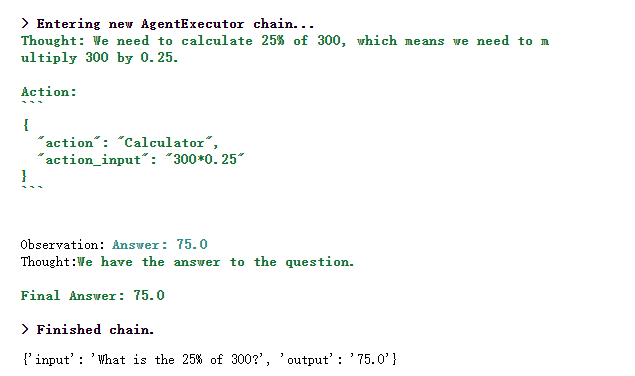

In [ ]:
question = "Tom M. Mitchell is an American computer scientist \
and the Founders University Professor at Carnegie Mellon University (CMU)\
what book did he write?"
result = agent(question) 

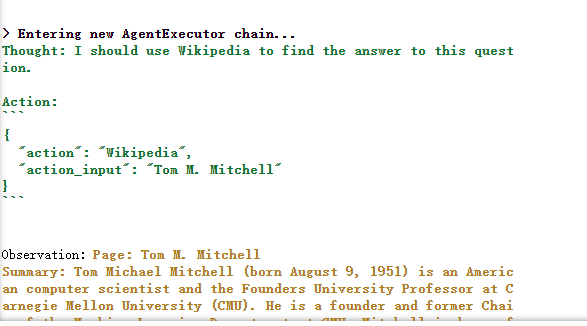

## Python Agent

In [ ]:
agent = create_python_agent(
    llm,
    tool=PythonREPLTool(),
    verbose=True
)

In [ ]:
customer_list = [["Harrison", "Chase"], 
                 ["Lang", "Chain"],
                 ["Dolly", "Too"],
                 ["Elle", "Elem"], 
                 ["Geoff","Fusion"], 
                 ["Trance","Former"],
                 ["Jen","Ayai"]
                ]

In [ ]:
agent.run(f"""Sort these customers by \
last name and then first name \
and print the output: {customer_list}""") 

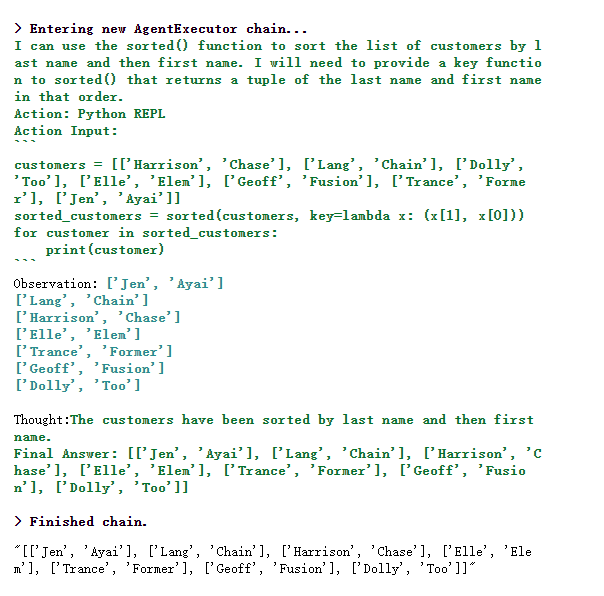

#### View detailed outputs of the chains

In [ ]:
import langchain
langchain.debug=True
agent.run(f"""Sort these customers by \
last name and then first name \
and print the output: {customer_list}""") 
langchain.debug=False

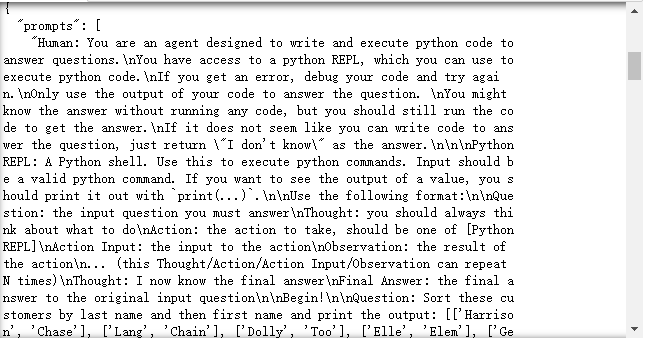

## Define your own tool

In [ ]:
#!pip install DateTime

In [ ]:
from langchain.agents import tool
from datetime import date

In [ ]:
@tool
def time(text: str) -> str:
    """Returns todays date, use this for any \
    questions related to knowing todays date. \
    The input should always be an empty string, \
    and this function will always return todays \
    date - any date mathmatics should occur \
    outside this function."""
    return str(date.today())
## Need to write the requirement in details in the function

In [ ]:
agent= initialize_agent(
    tools + [time], 
    llm, 
    agent=AgentType.CHAT_ZERO_SHOT_REACT_DESCRIPTION,
    handle_parsing_errors=True,
    verbose = True)

**Note**: 

The agent will sometimes come to the wrong conclusion (agents are a work in progress!). 

If it does, please try running it again.

In [ ]:
try:
    result = agent("whats the date today?") 
except: 
    print("exception on external access")

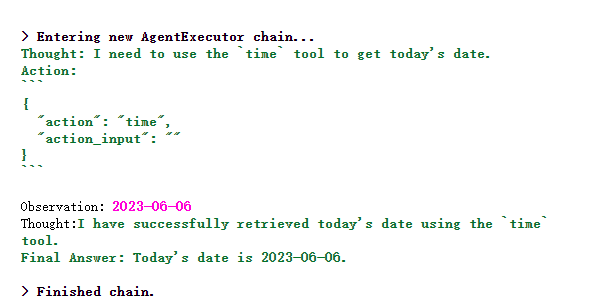